In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
count = mouse_study["Mouse ID"].nunique()
count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicaterows = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"])]
# Optional: Get all the data for the duplicate mouse ID. 
duplicaterows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Drop the duplicate data
clean_mouse_study = mouse_study.drop_duplicates(["Mouse ID", "Timepoint"],keep='first')
clean_mouse_study.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [5]:
# Checking the number of mice in the clean DataFrame.
count_clean = clean_mouse_study["Mouse ID"].nunique()
count_clean

249

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_data = clean_mouse_study.filter(["Drug Regimen","Tumor Volume (mm3)"])
tumor_group = tumor_data.groupby(["Drug Regimen"])
tumor_group.agg(['mean', 'median', 'var', 'std', 'sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [7]:
#Group cleaned data frame by drug regimen
drug_group = clean_mouse_study.groupby(["Drug Regimen"]).mean()
rn_drug_group = drug_group.rename(columns={"Age_months":"Age (months)"})
rn_drug_group

,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.570513,27.076923,17.083333,52.393463,1.000000
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [8]:
meas_counts = clean_mouse_study.value_counts(["Drug Regimen"])
meas_counts

Drug Regimen
Capomulin       230
Ramicane        228
Ketapril        188
Naftisol        186
Zoniferol       182
Placebo         181
Stelasyn        181
Ceftamin        178
Infubinol       178
Propriva        156
dtype: int64

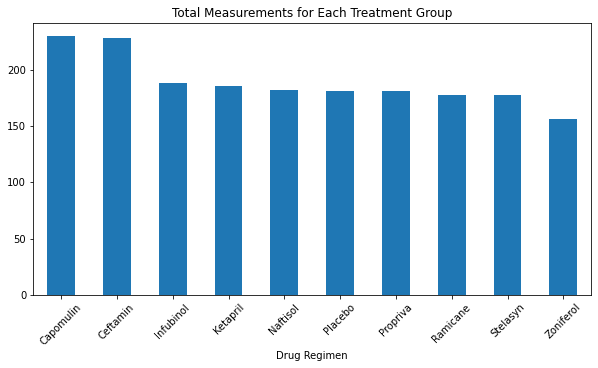

<Figure size 432x288 with 0 Axes>

In [9]:
# Use pandas to create a bar graph for all the measurments of each treatment
pandas_bar = meas_counts.plot(kind='bar', figsize=(10,5), width=0.5)
plt.title("Total Measurements for Each Treatment Group")
plt.xlabel("Drug Regimen")
labels = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
pandas_bar.set_xticklabels(labels, rotation=45)
plt.show()
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

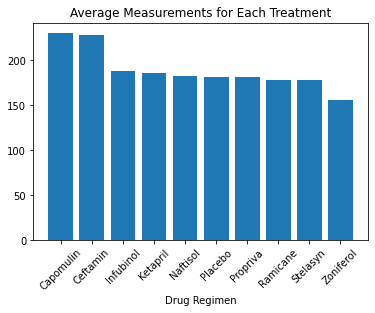

In [10]:
# Generate the same bar graph using pyplot
labels = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
y_values = [230, 228, 188, 186, 182, 181, 181, 178, 178, 156]

x = np.arange(len(labels))

plt.bar(x, y_values)

plt.title("Average Measurements for Each Treatment")
plt.xlabel("Drug Regimen")
tick_locations = [value for value in x]
plt.xticks(tick_locations, labels, rotation=45)

plt.show

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Value count sex to find the values for each section of the pie chart
clean_mouse_study.value_counts(["Sex"])

Sex   
Male      958
Female    930
dtype: int64

Text(0.5, 1.0, 'Gender Distribution of Mice in the Study')

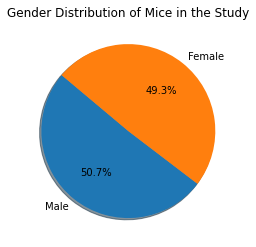

In [12]:
#create labels
labels = ["Male", "Female"]
#enter values
values = [958, 930]

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Gender Distribution of Mice in the Study")

In [40]:
temp=clean_mouse_study.Sex.value_counts()

Text(0.5, 1.0, 'Gender Distribution of Mice in the Study')

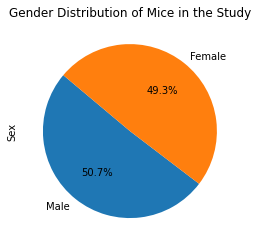

In [14]:
#Generate pie chart using pandas
#pandas_pie = clean_mouse_study.plot.pie(y='Sex', figsize=(5,5))

abc = temp.plot(kind='pie', autopct="%1.1f%%", startangle=140)
plt.title("Gender Distribution of Mice in the Study")

In [15]:
#groupby mouse ID and take the max timepoint of each mouse to get each final measurement
mouse_group = clean_mouse_study.groupby(["Mouse ID"]).max("Timepoint")
mouse_group

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
a203,20,23,45,67.973419,2
a251,21,25,45,65.525743,1
a262,17,29,45,70.717621,4
a275,20,28,45,62.999356,3
a366,16,29,30,63.440686,1
...,...,...,...,...,...
z435,12,26,10,48.710661,0
z578,11,16,45,45.000000,0
z581,24,25,45,62.754451,3


In [16]:
clean_mouse_study.iloc[75, :]


Mouse ID                  z578
Drug Regimen          Ramicane
Sex                       Male
Age_months                  11
Weight (g)                  16
Timepoint                    0
Tumor Volume (mm3)        45.0
Metastatic Sites             0
Name: 75, dtype: object

In [17]:
clean_mouse_study.groupby(["Mouse ID"]).idxmax()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
a203,454,454,463,463,461
a251,464,464,473,473,466
a262,474,474,483,483,481
a275,484,484,493,493,492
a366,494,494,500,500,500
...,...,...,...,...,...
z435,1860,1860,1862,1862,1860
z578,75,75,84,75,75
z581,1863,1863,1872,1872,1870


In [18]:
#Make box plot with dataframe only containing rows for the max timepoint of each mouse

In [19]:
#use loc to make dataframe containing only the mice treated with Capomulin
capo = clean_mouse_study.loc[(clean_mouse_study['Drug Regimen'] == "Capomulin"), :]
capo

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


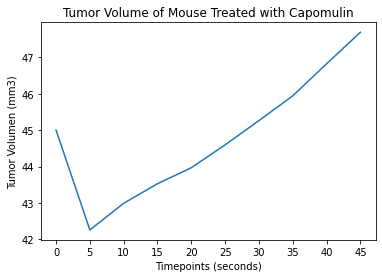

In [38]:
#use loc to make dataframe for just i557 (aka Stuart)
stuart = capo.loc[(capo['Mouse ID'] == "i557"), :]

# x-axis will be length of Stuart's data frame using Timepoints as labels
stuarts_x = np.arange(len(stuart))
labels = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
tick_locations = []
for x in stuarts_x:
    tick_locations.append(x)

# y values = stuart's tumor volume
stuarts_y = stuart["Tumor Volume (mm3)"]

#add labels
plt.title("Tumor Volume of Mouse Treated with Capomulin")
plt.ylabel("Tumor Volumen (mm3)")
plt.xlabel("Timepoints (seconds)")
plt.xticks(tick_locations, labels)

#plot the graph
plt.plot(stuarts_x, stuarts_y)
plt.show()

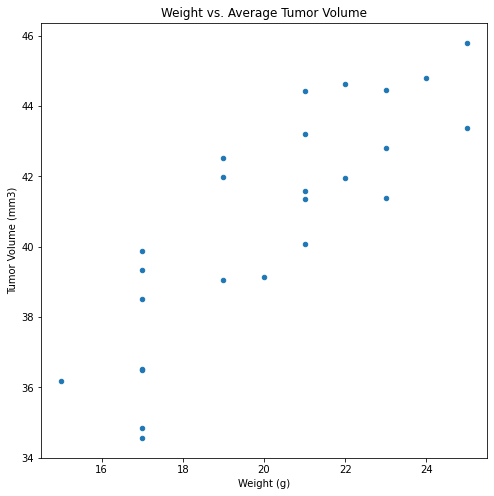

In [49]:
#drop all the columns from capo except mouse Id, weight, and tumor volume
drop1 = capo.drop('Drug Regimen', 1)
drop2 = drop1.drop('Sex', 1)
drop3 = drop2.drop('Age_months', 1)
drop4 = drop3.drop('Timepoint', 1)
new_capo = drop4.drop('Metastatic Sites', 1)
new_capo

#group by Mouse ID and get the mean
capo_mean = new_capo.groupby(["Mouse ID"]).mean()

#use pandas to plot a scatter plot
capo_mean.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=False, figsize=(8,8),
              title="Weight vs. Average Tumor Volume")
plt.show()

In [59]:
#Calculate the correlation coefficient
wght = capo_mean.iloc[:, 0]
tum = capo_mean.iloc[:, 1]
correlation = st.pearsonr(wght, tum)
print(f"The correlation between weight and average tumor size is {round(correlation[0],2)}")



The correlation between weight and average tumor size is 0.84


In [63]:
#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = stats.linregress(wght, tum)


AttributeError: 'DataFrame' object has no attribute 'linregress'

In [ ]:
regress_values = wght * slope + intercept
print(f"The r-squared is: {rvalue**2}")

plt.scatter(wght,tum)
plt.plot(wght,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

#Plot the linear regression